In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

## Mistery Function

In [25]:
def f( x, offset=-40, sd =0):
    # print("x",x)
    n = x.shape[0]
    x1 = x[:, 0]
    x2 = x[:, 1]
    term1 = 2
    term2 = 0.01*(x2-x1**2.0)**2.0
    term3 = (1 -  x1 )** 2
    term4 = 2*(2-x2)**2
    term5 = 7*np.sin(0.5*x1)*np.sin(0.7*x1*x2)
    fval = term1 + term2 + term3 +term4 +term5
    if sd == 0:
        noise = np.zeros(n).reshape(n, 1)
    else:
        noise = np.random.normal(0, sd, n).reshape(n, 1)
    # print("fval",-fval.reshape(-1, 1) + noise.reshape(-1, 1))
    return -(fval.reshape(n,1) + offset)+ noise.reshape(-1, 1)

In [50]:

X = np.random.random((10000,2))*5


In [51]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery_bnch/"
files = os.listdir(path)

best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    results_1.append(best_value - data.values)
    
mean_values = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE = 1.95*std_values/np.sqrt(len(files))

In [54]:
mean_values - MSE

array([[ 4.14530509e+01,  2.59524662e+00],
       [ 4.04530509e+01,  1.89602442e+00],
       [ 3.94530509e+01,  1.50205755e+00],
       [ 3.84530509e+01,  1.06280941e+00],
       [ 3.74530509e+01,  8.62420944e-01],
       [ 3.64530509e+01,  6.66178370e-01],
       [ 3.54530509e+01,  5.65117053e-01],
       [ 3.44530509e+01,  4.79520967e-01],
       [ 3.34530509e+01,  3.68377178e-01],
       [ 3.24530509e+01,  1.51642590e-01],
       [ 3.14530509e+01,  9.57779425e-02],
       [ 3.04530509e+01,  6.37010682e-02],
       [ 2.94530509e+01,  8.99229933e-03],
       [ 2.84530509e+01, -2.12112898e-02],
       [ 2.74530509e+01, -3.78134299e-02],
       [ 2.64530509e+01, -5.50096957e-02],
       [ 2.54530509e+01, -3.48902094e-02],
       [ 2.44530509e+01, -4.74619189e-02],
       [ 2.34530509e+01,  1.69671486e-02],
       [ 2.24530509e+01,  1.42777776e-02],
       [ 2.14530509e+01,  1.40951258e-02],
       [ 2.04530509e+01,  1.40951443e-02],
       [ 1.94530509e+01,  1.19125582e-02],
       [ 1.

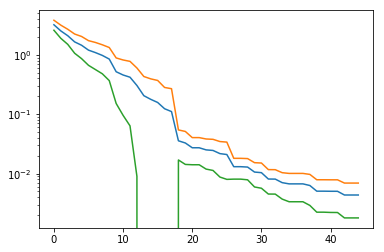

In [52]:
plt.plot(mean_values[:,1])
plt.plot(mean_values[:,1]+MSE[:,1])
plt.plot(mean_values[:,1]-MSE[:,1])
plt.yscale("log")